In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('zuu crew scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [51]:
X = df['TotalHours'].values.reshape(-1, 1)
X = ((X - np.mean(X)) / np.std(X))
y = df['CapstoneScore'].values
#Get the shapes of X and y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)


The shape of the independent fatures are  (72, 1)
The shape of the dependent fatures are  (72,)


In [52]:
def create_polynomial_features(X_1d, degree):
    """
    X_1d: shape (m, 1) with a single feature
    returns: shape (m, degree+1) including bias term (1)
    """
    m = X_1d.shape[0]
    X_poly = np.ones((m, 1))  # bias column
    for p in range(1, degree + 1):
        X_poly = np.hstack([X_poly, X_1d ** p])
    return X_poly


In [53]:
def compute_cost(X, Y, beta):
    m = len(Y)
    y_hat = X.dot(beta)
    cost = (1 / (2 * m)) * np.sum((y_hat - Y) ** 2)
    return cost

def gradient_descent(X, Y, beta, lr, n_iter):
    m = len(Y)
    cost_histroy = []

    for i in range(n_iter):
        y_hat = X.dot(beta)
        gradients = (1 / m) * X.T.dot(y_hat - Y)

        beta = beta - lr * gradients

        cost = compute_cost(X, Y, beta)
        cost_histroy.append(cost)

        if i % 100 == 0:
            print(f"Iteration : {i}: Cost : {cost:.4f}")

    return cost_histroy, beta

In [54]:
def predict(X, beta):
    return X.dot(beta)

In [55]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


In [56]:
learning_rates = [0.00001, 0.001, 0.1, 1.0]
iteration_counts = [1000, 5000, 10000]

In [57]:
results = {}  # key: (degree, lr, n_iter)

degrees = [1, 2, 3]
for deg in degrees:
    print("\n" + "="*60)
    print(f"Degree {deg}")
    print("="*60)
    X_poly = create_polynomial_features(X, degree=deg)

    for lr in learning_rates:
        for n_iter in iteration_counts:
            print(f"\nTraining with α = {lr}, iterations = {n_iter}")
            beta_init = np.zeros(X_poly.shape[1])
            cost_history, beta = gradient_descent(X_poly, y, beta_init, lr=lr, n_iter=n_iter)
            y_pred = X_poly.dot(beta)

            results[(deg, lr, n_iter)] = {
                "beta": beta,
                "cost_history": cost_history,
                "MSE": mse(y, y_pred),
                "MAE": mae(y, y_pred),
                "RMSE": rmse(y, y_pred),
                "R2": r2(y, y_pred),
            }

            print(f"Final Cost: {cost_history[-1]:.4f} | MSE: {results[(deg, lr, n_iter)]['MSE']:.4f} | "
                  f"R²: {results[(deg, lr, n_iter)]['R2']:.4f}")


Degree 1

Training with α = 1e-05, iterations = 1000
Iteration : 0: Cost : 1661.2956
Iteration : 100: Cost : 1658.0012
Iteration : 200: Cost : 1654.7134
Iteration : 300: Cost : 1651.4321
Iteration : 400: Cost : 1648.1574
Iteration : 500: Cost : 1644.8892
Iteration : 600: Cost : 1641.6276
Iteration : 700: Cost : 1638.3725
Iteration : 800: Cost : 1635.1238
Iteration : 900: Cost : 1631.8817
Final Cost: 1628.6784 | MSE: 3257.3568 | R²: -10.4002

Training with α = 1e-05, iterations = 5000
Iteration : 0: Cost : 1661.2956
Iteration : 100: Cost : 1658.0012
Iteration : 200: Cost : 1654.7134
Iteration : 300: Cost : 1651.4321
Iteration : 400: Cost : 1648.1574
Iteration : 500: Cost : 1644.8892
Iteration : 600: Cost : 1641.6276
Iteration : 700: Cost : 1638.3725
Iteration : 800: Cost : 1635.1238
Iteration : 900: Cost : 1631.8817
Iteration : 1000: Cost : 1628.6461
Iteration : 1100: Cost : 1625.4169
Iteration : 1200: Cost : 1622.1942
Iteration : 1300: Cost : 1618.9779
Iteration : 1400: Cost : 1615.76

c:\Users\User\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_24456\2086490329.py:4: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((y_hat - Y) ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_24456\178728563.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_24456\178728563.py:11: RuntimeWarning: overflow encountered in square
  ss_res = np.sum((y_true - y_pred) ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_24456\2086490329.py:15: RuntimeWarning: invalid value encountered in subtract
  beta = beta - lr * gradients


Iteration : 7800: Cost : nan
Iteration : 7900: Cost : nan
Iteration : 8000: Cost : nan
Iteration : 8100: Cost : nan
Iteration : 8200: Cost : nan
Iteration : 8300: Cost : nan
Iteration : 8400: Cost : nan
Iteration : 8500: Cost : nan
Iteration : 8600: Cost : nan
Iteration : 8700: Cost : nan
Iteration : 8800: Cost : nan
Iteration : 8900: Cost : nan
Iteration : 9000: Cost : nan
Iteration : 9100: Cost : nan
Iteration : 9200: Cost : nan
Iteration : 9300: Cost : nan
Iteration : 9400: Cost : nan
Iteration : 9500: Cost : nan
Iteration : 9600: Cost : nan
Iteration : 9700: Cost : nan
Iteration : 9800: Cost : nan
Iteration : 9900: Cost : nan
Final Cost: nan | MSE: nan | R²: nan

Degree 3

Training with α = 1e-05, iterations = 1000
Iteration : 0: Cost : 1661.2538
Iteration : 100: Cost : 1653.7944
Iteration : 200: Cost : 1646.3777
Iteration : 300: Cost : 1639.0034
Iteration : 400: Cost : 1631.6711
Iteration : 500: Cost : 1624.3806
Iteration : 600: Cost : 1617.1317
Iteration : 700: Cost : 1609.9240
I

In [58]:
for deg in degrees:
    cand = [(k, v) for k, v in results.items() if k[0] == deg]
    best_key, best_val = min(cand, key=lambda kv: kv[1]["MSE"])
    _, lr, n_iter = best_key
    print("\n" + "-"*60)
    print(f"Best (by MSE) for degree {deg}: α={lr}, iters={n_iter}")
    print(f"  MSE={best_val['MSE']:.4f}  MAE={best_val['MAE']:.4f}  RMSE={best_val['RMSE']:.4f}  R²={best_val['R2']:.4f}")
    print(f"  β = {best_val['beta']}")



------------------------------------------------------------
Best (by MSE) for degree 1: α=1.0, iters=1000
  MSE=24.8928  MAE=3.9351  RMSE=4.9893  R²=0.9129
  β = [55.10833333 16.15041781]

------------------------------------------------------------
Best (by MSE) for degree 2: α=0.1, iters=1000
  MSE=24.3853  MAE=3.8240  RMSE=4.9381  R²=0.9147
  β = [54.33642556 16.12715013  0.77190777]

------------------------------------------------------------
Best (by MSE) for degree 3: α=0.1, iters=5000
  MSE=24.0833  MAE=3.8530  RMSE=4.9075  R²=0.9157
  β = [54.21800254 14.82016013  0.86911393  0.70387172]


In [59]:
def plot_fit(degree, beta):
    X_poly = create_polynomial_features(X, degree)
    order = np.argsort(X.flatten())
    x_sorted = X.flatten()[order]
    y_sorted_pred = X_poly.dot(beta)[order]

    plt.scatter(X, y, alpha=0.7)
    plt.plot(x_sorted, y_sorted_pred)
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.xlabel("TotalHours")
    plt.ylabel("CapstoneScore")
    plt.show()


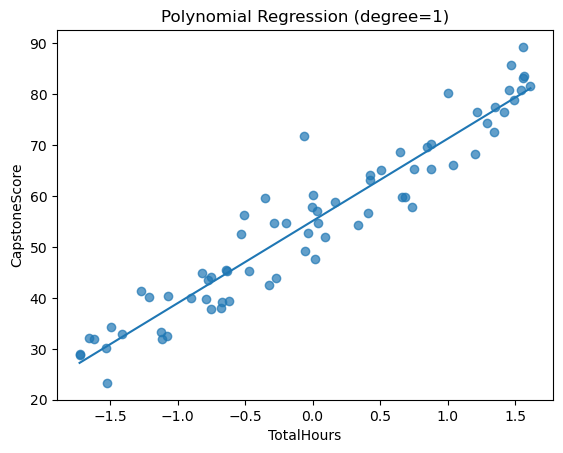

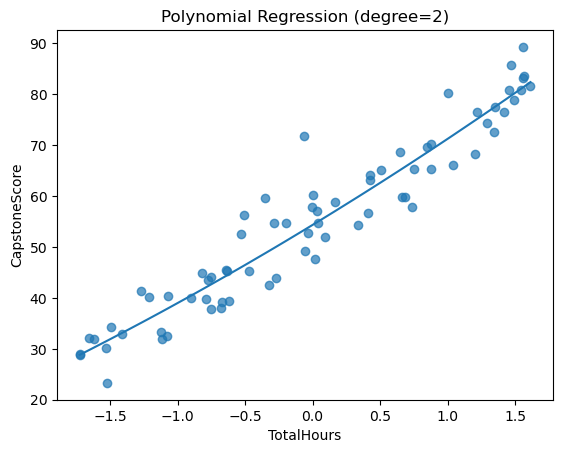

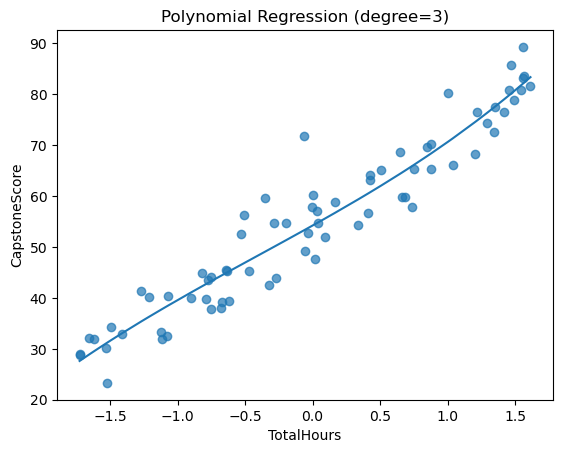

In [60]:
for deg in degrees:
    cand = [(k, v) for k, v in results.items() if k[0] == deg]
    best_key, best_val = min(cand, key=lambda kv: kv[1]["MSE"])
    plot_fit(deg, best_val["beta"])